In [2]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from PIL import Image
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
fat_serum = pd.read_csv('fatty_acids_serum_Train.csv')
fat_serum.head()

,ID,Serum C14:0 (myristic acid),Serum C16:0 (palmitic acid),Serum C16:1 (palmitoleic acid),Serum C18:0 (stearic acid),Serum C18:1 n-9 (oleic acid),Serum total C18:1,"Serum C18:2 n-6 (linoleic acid, LA)","Serum C18:3 n-6 (gamma-linoleic acid, GLA)",Serum C20:1 n-9,Serum C20:2 n-6,Serum C20:3 n-6,Serum C20:4 n-6,"Serum C20:5 n-3 (eicosapentaenoic acid, EPA)","Serum C22:5 n-3 (docosapentaenoic acid, DPA)","Serum C22:6 n-3 (docosahexaenoic acid, DHA)"
0,11,0.26,29.64,0.37,14.92,7.43,9.02,23.22,0.14,0.19,0.37,2.91,9.00,1.63,1.22,7.11
1,12,0.17,29.77,0.45,13.99,6.66,8.23,18.50,0.15,0.18,0.27,1.51,12.66,4.11,1.40,8.61
2,13,0.20,29.22,0.48,15.34,8.32,9.90,20.98,0.29,0.13,0.31,2.10,9.57,3.39,1.06,7.01
3,14,0.31,28.76,0.49,17.03,7.73,9.37,22.50,0.20,0.09,0.27,3.51,10.75,0.89,1.04,4.80
4,15,0.26,28.94,0.41,14.79,11.45,13.47,18.84,0.20,0.11,0.27,3.03,11.71,1.33,1.28,5.36


In [4]:
fat_sperm = pd.read_csv('fatty_acids_spermatoza_Train.csv')
fat_sperm.head()

,ID,Sperm C14:0 (myristic acid),Sperm C15:0 (pentadecanoic acid),Sperm C16:0 (palmitic acid),Sperm C16:1 n-7 (palmitoleic acid),Sperm C17:0,Sperm C18:0 (stearic acid),Sperm C18:1 trans n-6 to n-11,Sperm C18:1 n-9 (oleic acid),Sperm C18:1 n-7 to n-11,...,Sperm C20:1 n-9,Sperm C20:2 n-6,Sperm C22:0,Sperm C20:3 n-6,Sperm C20:4 n-6 and C22:1 n-9 combined,"Sperm C20:5 n-3 (eicosapentaenoic acid, EPA)",Sperm C24:0,Sperm C24:1 n-9,"Sperm C22:5 n-3 (docosapentaenoic acid, DPA)","Sperm C22:6,n3 (docosahexaenoic acid, DHA)"
0,11,1.8,0.2,21.6,1.7,0.2,7.5,1.7,21.6,2.7,...,0.5,0.6,1.2,1.7,1.6,0.02,1.0,1.2,0.9,18.6
1,12,1.3,0.2,23.5,1.1,0.3,8.8,1.1,13.2,2.3,...,0.4,0.5,1.6,1.8,2.4,0.08,0.9,1.4,2.0,25.0
2,13,1.8,0.2,20.3,1.7,0.2,8.7,2.2,23.2,2.5,...,0.5,0.4,1.4,1.9,2.0,0.07,1.2,1.3,0.8,16.1
3,14,1.4,0.2,18.4,1.2,0.3,9.2,2.0,26.1,1.7,...,0.8,0.4,2.2,1.0,4.2,0.31,2.9,3.8,0.8,3.6
4,15,1.7,0.2,24.0,1.4,0.3,8.4,1.3,15.3,3.0,...,0.7,0.6,2.3,1.7,2.1,0.06,1.9,1.8,1.0,16.0


In [5]:
related_info = pd.read_csv('participant_related_data_Train.csv')
related_info.head()

,ID,Abstinence time(days),Body mass index (kg/m²),Age (years)
0,11,3,28.8,41
1,12,3.5,29.8,30
2,13,1,28.1,44
3,14,3,34.7,40
4,15,4,30.9,39


In [6]:
semen = pd.read_csv('semen_analysis_data_Train.csv')
semen.head()

,ID,Sperm concentration (x10⁶/mL),Total sperm count (x10⁶),Ejaculate volume (mL),Sperm vitality (%),Normal spermatozoa (%),Head defects (%),Midpiece and neck defects (%),Tail defects (%),Cytoplasmic droplet (%),Teratozoospermia index,Progressive motility (%),Non progressive sperm motility (%),Immotile sperm (%),"High DNA stainability, HDS (%)","DNA fragmentation index, DFI (%)"
0,11,97.0,129.0,1.3,80,2.4,97.0,28.0,9.7,7.3,1.45,11,17,72,6,24
1,12,29.4,213.9,7.3,94,2.5,96.0,33.3,14.9,6.5,1.55,33,54,13,10,8
2,13,74.4,136.1,1.8,88,3.9,96.0,31.0,5.8,3.9,1.42,33,30,37,10,4
3,14,3.8,6.9,1.8,96,4.0,96.0,36.0,17.0,7.5,1.63,41,43,16,13,15
4,15,4.0,5.8,1.4,93,0.0,100.0,50.5,21.5,6.0,1.78,15,46,39,27,28


In [7]:
hormone = pd.read_csv('sex_hormones_Train.csv')
hormone.head()

,ID,Seminal plasma anti-Müllerian hormone (AMH) (pmol/L),Serum total testosterone (nmol/L),Serum oestradiol (nmol/L),"Serum sex hormone-binding globulin, SHBG (nmol/L)","Serum follicle-stimulating hormone, FSH (IU/L)","Serum Luteinizing hormone, LH (IU/L)",Serum inhibin B (ng/L),"Serum anti-Müllerian hormone, AMH (pmol/L)"
0,11,69,18.4,0.15,30,3.35,3.46,197,14
1,12,1,12.8,0.14,23,3.36,2.24,194,44
2,13,131,25.8,0.18,39,4.68,8.90,194,38
3,14,1,11.4,0.16,16,8.39,3.06,58,10
4,15,5,23.9,0.14,33,5.78,2.58,129,29


The first level in the list is the individual. THe second level is each frame.

In [54]:
folder = 'VISEM_Tracking_Train_v4/Train'
label_arr = []
frame_per_ind = []
for file in os.listdir(folder):
    label_folder = folder + '/'+ file + '/labels'
    person_arr = []
    n_frame = 0
    for frame in os.listdir(label_folder):
        n_frame += 1
        person_arr.append(pd.read_table(label_folder+'/'+frame, sep = ' ', header = None))
    label_arr.append(np.asarray(person_arr, dtype = 'object'))
    frame_per_ind.append(n_frame)

In [55]:
# number of frames per individual
frame_per_ind = np.hstack(frame_per_ind)

Individual number 23 has 174 empty frames. Some videos have different frame rates (for individual 35, 52 has 1440 extracted frames, and individual 82 has 1500 extracted frames) 

In [56]:
frame_per_ind

array([1470, 1470, 1470, 1470, 1470, 1470, 1470, 1470, 1296, 1470, 1470,
       1470, 1440, 1470, 1470, 1470, 1440, 1470, 1470, 1500])

In [46]:
label_arr = np.asarray(label_arr, dtype = 'object')
label_arr.shape

(20,)

## Counting number of different types of sperm using only the FIRST FRAME:
Note that each folder contain the same sperms. So, we only need to count the number in the first txt file of each invidual 


In [ ]:
count_frame = lambda i, frame: np.vstack((np.array([sum(label_arr[i][frame][0] == k) for k in 
                                                  np.unique(label_arr[i][frame][0])]), np.unique(label_arr[i][frame][0])))
count_individual = lambda i: np.array([count_frame(i, frame) for frame in frame_per_ind])

indi_sperm_count = [count_individual(i) for i in range(20)]
print('sperm count for each individual (arr 1: count, arr 2: type):')
[count_individual(i) for i in range(20)]

In [14]:
count_individual = lambda i: np.vstack((np.array([sum(label_arr[i][0][0] == k) for k in 
                                                  np.unique(label_arr[i][0][0])]), np.unique(label_arr[i][0][0])))

indi_sperm_count = [count_individual(i) for i in range(20)]
print('sperm count for each individual (arr 1: count, arr 2: type):')
[count_individual(i) for i in range(20)]

sperm count for each individual (arr 1: count, arr 2: type):


[array([[43],
        [ 0]], dtype=int64),
 array([[27,  1,  1],
        [ 0,  1,  2]], dtype=int64),
 array([[43,  1],
        [ 0,  2]], dtype=int64),
 array([[3],
        [0]], dtype=int64),
 array([[21,  1,  1],
        [ 0,  1,  2]], dtype=int64),
 array([[19,  4],
        [ 0,  1]], dtype=int64),
 array([[21,  3],
        [ 0,  2]], dtype=int64),
 array([[12],
        [ 0]], dtype=int64),
 array([[4],
        [0]], dtype=int64),
 array([[62,  4],
        [ 0,  1]], dtype=int64),
 array([[4, 1],
        [0, 1]], dtype=int64),
 array([[12],
        [ 0]], dtype=int64),
 array([[31,  2],
        [ 0,  2]], dtype=int64),
 array([[45,  1],
        [ 0,  2]], dtype=int64),
 array([[12],
        [ 0]], dtype=int64),
 array([[8, 1],
        [0, 2]], dtype=int64),
 array([[7, 1],
        [0, 2]], dtype=int64),
 array([[27,  2,  1],
        [ 0,  1,  2]], dtype=int64),
 array([[16,  2],
        [ 0,  2]], dtype=int64),
 array([[26,  1],
        [ 0,  2]], dtype=int64)]

number of each sperm types counted on the first frame of each video:

In [15]:
whole_counts = np.hstack((indi_sperm_count))
np.vstack((np.array([sum(whole_counts[0,:][whole_counts[1]==i]) for i in range(3)]),
          np.arange(3)))

array([[443,  13,  15],
       [  0,   1,   2]], dtype=int64)

## Distribution of bounding boxes

In [119]:
# stack all frames together to perform a scatter plot
stacked_arr = np.hstack(label_arr)

In [122]:
stacked_arr = np.vstack(stacked_arr)

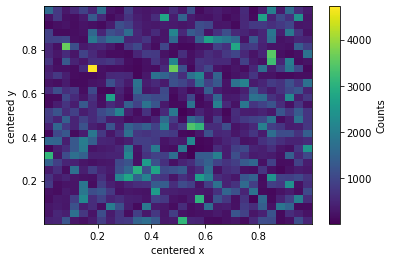

In [141]:
x, y = stacked_arr[:,1], stacked_arr[:,2]
fig2 = plt.figure()
plt.hist2d(x, y, bins=30)
plt.xlabel('centered x')
plt.ylabel('centered y')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.savefig('centered_x_centered_y_historgram.pdf')

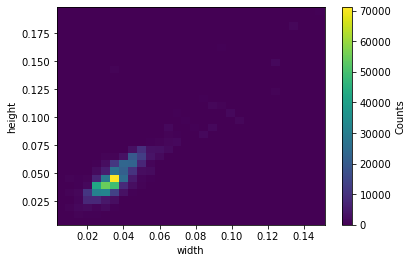

In [140]:
x, y = stacked_arr[:,3], stacked_arr[:,4]
fig2 = plt.figure()
plt.hist2d(x, y, bins=30)
plt.xlabel('width')
plt.ylabel('height')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.savefig('height_width_historgram.pdf')

<Figure size 432x288 with 0 Axes>

## Number of sperm in each video:

In [58]:
frame_per_ind[12]

1440

In [17]:
np.where(frame_per_ind!= 1470)

(array([ 8, 12, 16, 19], dtype=int64),)

In [57]:
m_frame_per_ind = frame_per_ind.copy()
m_frame_per_ind[[12,16]]  = 1470
m_frame_per_ind[19] = 1500

In [49]:
m_frame_per_ind

array([1470, 1470, 1470, 1470, 1470, 1470, 1470, 1470, 1296, 1470, 1470,
       1470, 1470, 1470, 1470, 1470, 1470, 1470, 1470, 1500])

In [50]:
label_arr[12].shape

(1440,)

In [61]:
sperm_per_frame = lambda person, frame: len(label_arr[person][frame])
sperm_per_video = lambda person: sum(np.array([sperm_per_frame(person, frame) for 
                                               frame in range(frame_per_ind[person])]))/m_frame_per_ind[person]
# average number of sperms for each person
sperm_per_video = np.array([sperm_per_video(person) for person in range(20)])
sperm_per_video

array([38.48163265, 26.77346939, 42.61632653,  3.91156463, 17.15306122,
       22.45578231, 22.11564626, 10.87278912,  2.48996914, 66.31020408,
        3.26462585, 10.90748299, 31.12380952, 45.25714286, 11.45034014,
        5.46598639, 12.21360544, 28.75034014, 13.87823129, 30.66333333])

In [62]:
np.histogram(sperm_per_video, bins='auto')

(array([8, 4, 4, 2, 1, 1], dtype=int64),
 array([ 2.48996914, 13.12667496, 23.76338078, 34.40008661, 45.03679243,
        55.67349826, 66.31020408]))

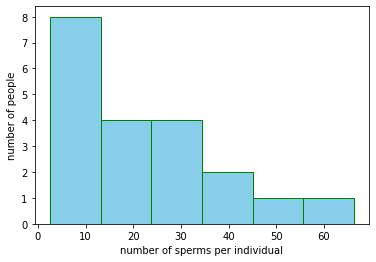

<Figure size 432x288 with 0 Axes>

In [143]:
plt.hist(sperm_per_video, bins='auto', color = "skyblue", ec="green")
# plt.title('Histogram on number of sperms per individual')
plt.xlabel('number of sperms per individual')
plt.ylabel('number of people')
plt.show()
plt.savefig('sperm_per_frame_historgram.pdf')

So, we can divide the dataset into 2 groups: a group with less than 35 sperms and a group of people with more than  34 sperms and analyze the related information

In [64]:
# index of people with less than 35 sperms
idl = np.where(sperm_per_video<34.25272109)[0]
len(idl)

16

In [65]:
# index of people with more than 34 sperms
idm = np.where(sperm_per_video>34.25272109)[0]
len(idm)

4

In [66]:
gr = np.repeat(0, 20)
gr[idl] = 0
gr[idm] = 1

In [67]:
fat_serum['group'] = gr
fat_sperm['group'] = gr
hormone['group'] = gr
semen['group'] = gr

In [68]:
fat_serum = fat_serum.drop(columns = 'ID')
fat_sperm = fat_sperm.drop(columns = 'ID')
hormone = hormone.drop(columns = 'ID')
semen = semen.drop(columns = 'ID')

## analysis based on related information
interestingly, all the people that have more than 34 sperms are more than 40 yearsold.

In [69]:
relatedm, relatedl = related_info.iloc[idm], related_info.iloc[idl]
relatedm

,ID,Abstinence time(days),Body mass index (kg/m²),Age (years)
0,11,3,28.8,41
2,13,1,28.1,44
9,24,Not reported,34.1,50
13,36,3,36.4,50


In [70]:
np.mean(relatedm.loc[:,relatedm.columns != 'ID']), np.mean(relatedl.loc[:,relatedl.columns != 'ID'])

(Body mass index (kg/m²)    31.85
 Age (years)                46.25
 dtype: float64,
 Body mass index (kg/m²)    29.7375
 Age (years)                35.0625
 dtype: float64)

### Fat serum 

In [89]:
fat_serum.columns

Index(['Serum C14:0 (myristic acid)', 'Serum C16:0 (palmitic acid)',
       'Serum C16:1 (palmitoleic acid)', 'Serum C18:0 (stearic acid)',
       'Serum C18:1 n-9 (oleic acid)', 'Serum total C18:1',
       'Serum C18:2 n-6 (linoleic acid, LA)',
       'Serum C18:3 n-6 (gamma-linoleic acid, GLA)', 'Serum C20:1 n-9',
       'Serum C20:2 n-6', 'Serum C20:3 n-6', 'Serum C20:4 n-6',
       'Serum C20:5 n-3  (eicosapentaenoic acid, EPA)',
       'Serum C22:5 n-3 (docosapentaenoic acid, DPA)',
       'Serum C22:6 n-3 (docosahexaenoic acid, DHA)', 'group'],
      dtype='object')

In [71]:
fat_serum.loc[fat_serum['group']==1]

,Serum C14:0 (myristic acid),Serum C16:0 (palmitic acid),Serum C16:1 (palmitoleic acid),Serum C18:0 (stearic acid),Serum C18:1 n-9 (oleic acid),Serum total C18:1,"Serum C18:2 n-6 (linoleic acid, LA)","Serum C18:3 n-6 (gamma-linoleic acid, GLA)",Serum C20:1 n-9,Serum C20:2 n-6,Serum C20:3 n-6,Serum C20:4 n-6,"Serum C20:5 n-3 (eicosapentaenoic acid, EPA)","Serum C22:5 n-3 (docosapentaenoic acid, DPA)","Serum C22:6 n-3 (docosahexaenoic acid, DHA)",group
0,0.26,29.64,0.37,14.92,7.43,9.02,23.22,0.14,0.19,0.37,2.91,9.00,1.63,1.22,7.11,1
2,0.20,29.22,0.48,15.34,8.32,9.90,20.98,0.29,0.13,0.31,2.10,9.57,3.39,1.06,7.01,1
9,0.27,29.15,0.40,16.48,7.82,9.17,23.33,0.27,0.11,0.29,4.03,8.76,1.08,1.25,5.40,1
13,0.26,28.09,0.36,15.76,7.68,9.70,20.79,0.16,0.15,0.30,2.65,8.43,3.25,1.49,8.60,1


In [97]:
fat_serum.columns=['myristic acid', 'palmitic acid', 'palmitoleic acid', 'stearic acid',
                          'oleic acid', 'Serum total C18:1', 'linoleic acid, LA',
       'gamma-linoleic acid', 'Serum C20:1 n-9',
       'Serum C20:2 n-6', 'Serum C20:3 n-6', 'Serum C20:4 n-6',
       'eicosapentaenoic acid',
       'docosapentaenoic acid',
       'docosahexaenoic acid', 'group']

In [98]:
# mean difference between classes
fm1 = np.mean(fat_serum.loc[fat_serum['group']==0,fat_serum.columns != 'group'])
fm2 = np.mean(fat_serum.loc[fat_serum['group']==1,fat_serum.columns != 'group'])  
(fm1 - fm2)/np.abs(fm2)

myristic acid            0.025253
palmitic acid            0.005620
palmitoleic acid         0.229814
stearic acid            -0.038440
oleic acid               0.169920
Serum total C18:1        0.159764
linoleic acid, LA        0.003255
gamma-linoleic acid     -0.078488
Serum C20:1 n-9          0.008621
Serum C20:2 n-6         -0.033465
Serum C20:3 n-6          0.013473
Serum C20:4 n-6          0.093331
eicosapentaenoic acid   -0.285561
docosapentaenoic acid   -0.044821
docosahexaenoic acid    -0.192123
dtype: float64

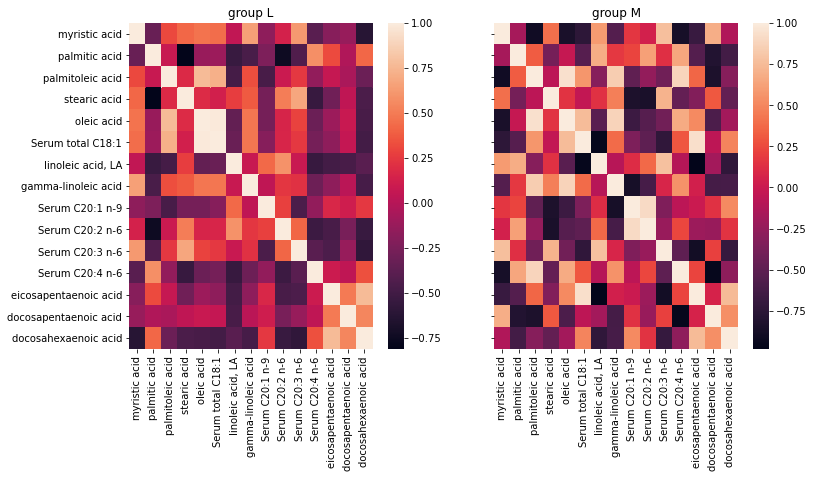

In [191]:
fig, axes = plt.subplots(1, 2, sharex = True, sharey= True, figsize=(12,6))
sn.heatmap(fat_serum.loc[fat_serum['group']==0,fat_serum.columns != 'group'].corr(), annot=False, ax = axes[0]) 
sn.heatmap(fat_serum.loc[fat_serum['group']==1,fat_serum.columns != 'group'].corr(), annot=False, ax = axes[1])
axes[0].title.set_text('group L')
axes[1].title.set_text('group M')
plt.savefig('fat_serum_corr.png')
plt.show()

### Fat sperms

In [101]:
fat_sperm.columns

Index(['Sperm C14:0 (myristic acid)', 'Sperm C15:0 (pentadecanoic acid)',
       'Sperm C16:0 (palmitic acid)', 'Sperm C16:1 n-7 (palmitoleic acid)',
       'Sperm C17:0', 'Sperm C18:0 (stearic acid)',
       'Sperm C18:1 trans n-6 to n-11', 'Sperm C18:1 n-9 (oleic acid)',
       'Sperm C18:1 n-7 to n-11', 'Sperm C18:2 n-6 (Linoleic acid, LA)',
       'Sperm C20:0', 'Sperm C18:3 n-6 (gamma-linoleic acid, GLA)',
       'Sperm C18:3 n-3 (a-linoleic acid, ALA)', 'Sperm C20:1 n-9',
       'Sperm C20:2 n-6', 'Sperm C22:0', 'Sperm C20:3 n-6',
       'Sperm C20:4 n-6 and C22:1 n-9 combined',
       'Sperm C20:5 n-3 (eicosapentaenoic acid, EPA)', 'Sperm C24:0',
       'Sperm C24:1 n-9', 'Sperm C22:5 n-3 (docosapentaenoic acid, DPA)',
       'Sperm C22:6,n3 (docosahexaenoic acid, DHA)', 'group'],
      dtype='object')

In [103]:
fat_sperm.columns = ['myristic acid', 'pentadecanoic acid',
       'palmitic acid', 'palmitoleic acid',
       'Sperm C17:0', 'stearic acid',
       'Sperm C18:1 trans n-6 to n-11', 'oleic acid',
       'Sperm C18:1 n-7 to n-11', 'Linoleic acid',
       'Sperm C20:0', 'gamma-linoleic acid',
       'a-linoleic acid', 'Sperm C20:1 n-9',
       'Sperm C20:2 n-6', 'Sperm C22:0', 'Sperm C20:3 n-6',
       'Sperm C20:4 n-6 & C22:1 n-9 combined',
       'eicosapentaenoic acid', 'Sperm C24:0',
       'Sperm C24:1 n-9', 'docosapentaenoic acid',
       'docosahexaenoic acid', 'group']

In [104]:
# mean difference between classes
fs1 = np.mean(fat_sperm.loc[fat_sperm['group']==0,fat_sperm.columns != 'group'])
fs2 = np.mean(fat_sperm.loc[fat_sperm['group']==1,fat_sperm.columns != 'group'])  
(fs1 - fs2)/np.abs(fs2)

myristic acid                          -0.197917
pentadecanoic acid                      0.500000
palmitic acid                          -0.023526
palmitoleic acid                       -0.246032
Sperm C17:0                             0.722222
stearic acid                            0.160550
Sperm C18:1 trans n-6 to n-11          -0.246429
oleic acid                             -0.223460
Sperm C18:1 n-7 to n-11                -0.070312
Linoleic acid                           0.199653
Sperm C20:0                             0.833333
gamma-linoleic acid                    -0.467262
a-linoleic acid                         0.195313
Sperm C20:1 n-9                         0.166667
Sperm C20:2 n-6                         0.250000
Sperm C22:0                             0.098485
Sperm C20:3 n-6                         0.282143
Sperm C20:4 n-6 & C22:1 n-9 combined    0.247126
eicosapentaenoic acid                   0.434524
Sperm C24:0                             0.716346
Sperm C24:1 n-9     

In [106]:
# mean difference between classes
fs1 = np.mean(fat_sperm.loc[fat_sperm['group']==0,fat_sperm.columns != 'group'])
fs2 = np.mean(fat_sperm.loc[fat_sperm['group']==1,fat_sperm.columns != 'group'])  
fs1 - fs2

myristic acid                          -0.356250
pentadecanoic acid                      0.100000
palmitic acid                          -0.518750
palmitoleic acid                       -0.387500
Sperm C17:0                             0.162500
stearic acid                            1.312500
Sperm C18:1 trans n-6 to n-11          -0.431250
oleic acid                             -4.262500
Sperm C18:1 n-7 to n-11                -0.168750
Linoleic acid                           0.718750
Sperm C20:0                             0.312500
gamma-linoleic acid                    -0.196250
a-linoleic acid                         0.015625
Sperm C20:1 n-9                         0.075000
Sperm C20:2 n-6                         0.118750
Sperm C22:0                             0.162500
Sperm C20:3 n-6                         0.493750
Sperm C20:4 n-6 & C22:1 n-9 combined    0.537500
eicosapentaenoic acid                   0.045625
Sperm C24:0                             0.931250
Sperm C24:1 n-9     

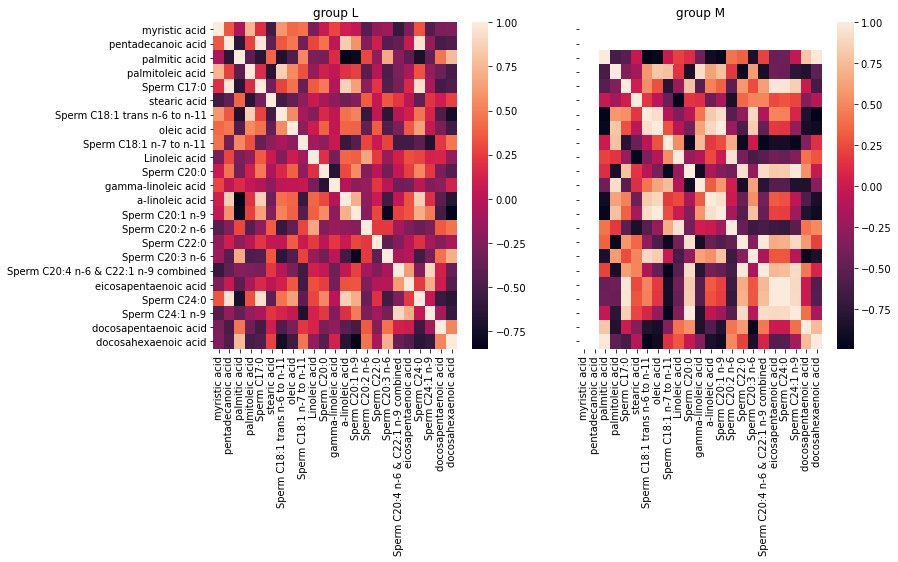

In [192]:
fig, axes = plt.subplots(1, 2, sharex = True, sharey= True, figsize=(12,6))
sn.heatmap(fat_sperm.loc[fat_sperm['group']==0,fat_sperm.columns != 'group'].corr(), annot=False, ax = axes[0]) 
sn.heatmap(fat_sperm.loc[fat_sperm['group']==1,fat_sperm.columns != 'group'].corr(), annot=False, ax = axes[1]) 
axes[0].title.set_text('group L')
axes[1].title.set_text('group M')
plt.savefig('fat_sperm_corr.png')
plt.show()

### Hormone analysis

In [78]:
# mean difference between classes
np.mean(hormone.loc[hormone['group']==0,hormone.columns != 'group']) - np.mean(hormone.loc[hormone['group']==1,hormone.columns != 'group'])  

Seminal plasma anti-Müllerian hormone (AMH) (pmol/L)   -49.250000
Serum total testosterone (nmol/L)                        4.075000
Serum oestradiol (nmol/L)                               -0.001250
Serum sex hormone-binding globulin, SHBG (nmol/L)        1.500000
Serum follicle-stimulating hormone, FSH (IU/L)           1.157500
Serum Luteinizing hormone, LH (IU/L)                    -0.406875
Serum inhibin B (ng/L)                                 -38.750000
Serum anti-Müllerian hormone, AMH (pmol/L)              12.625000
dtype: float64

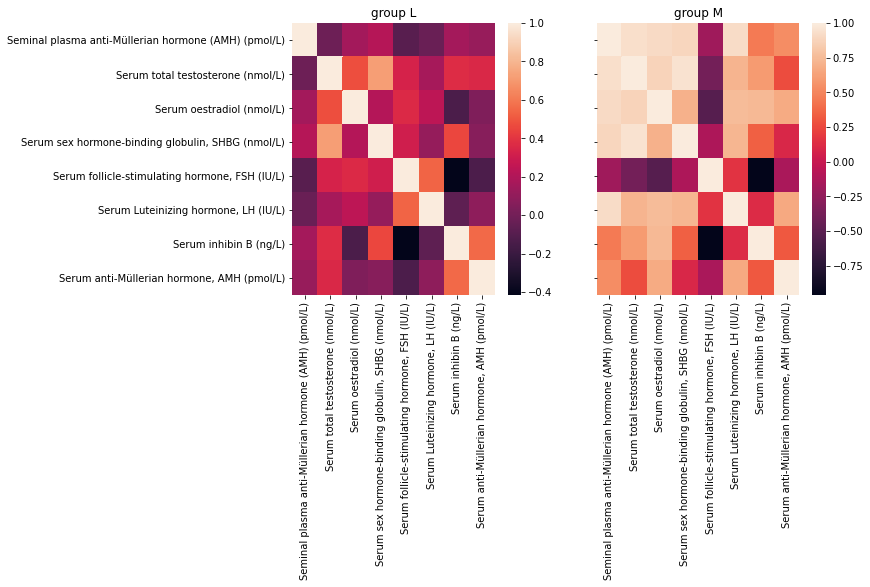

In [193]:
fig, axes = plt.subplots(1, 2, sharex = True, sharey= True, figsize=(10,5))
sn.heatmap(hormone.loc[hormone['group']==0,hormone.columns != 'group'].corr(), annot=False, ax = axes[0]) 
sn.heatmap(hormone.loc[hormone['group']==1,hormone.columns != 'group'].corr(), annot=False, ax = axes[1]) 
axes[0].title.set_text('group L')
axes[1].title.set_text('group M')
plt.savefig('hormone_corr.png')
plt.show()

### Semen analysis

In [81]:
# mean difference between classes
fse1 = np.mean(semen.loc[semen['group']==0,semen.columns != 'group'])
fse2 = np.mean(semen.loc[semen['group']==1,semen.columns != 'group'])  
(fse1 - fse2)/np.abs(fse2)

Sperm concentration (x10⁶/mL)        -0.818490
Total sperm count (x10⁶)             -0.414604
Ejaculate volume (mL)                 1.699324
Sperm vitality (%)                    0.030506
Normal spermatozoa (%)               -0.213362
Head defects (%)                      0.005288
Midpiece and neck defects (%)         0.186918
Tail defects (%)                      0.380931
Cytoplasmic droplet (%)               0.398571
Teratozoospermia index                0.082168
Progressive motility (%)             -0.121739
Non progressive sperm motility (%)    0.301402
Immotile sperm (%)                   -0.102528
High DNA stainability, HDS (%)        1.068966
DNA fragmentation index, DFI (%)     -0.028846
dtype: float64

In [82]:
fse1 - fse2

Sperm concentration (x10⁶/mL)        -78.57500
Total sperm count (x10⁶)             -69.94375
Ejaculate volume (mL)                  3.14375
Sperm vitality (%)                     2.56250
Normal spermatozoa (%)                -0.61875
Head defects (%)                       0.51250
Midpiece and neck defects (%)          4.51875
Tail defects (%)                       5.21875
Cytoplasmic droplet (%)                1.74375
Teratozoospermia index                 0.11750
Progressive motility (%)              -3.50000
Non progressive sperm motility (%)     8.06250
Immotile sperm (%)                    -4.56250
High DNA stainability, HDS (%)         7.75000
DNA fragmentation index, DFI (%)      -0.56250
dtype: float64

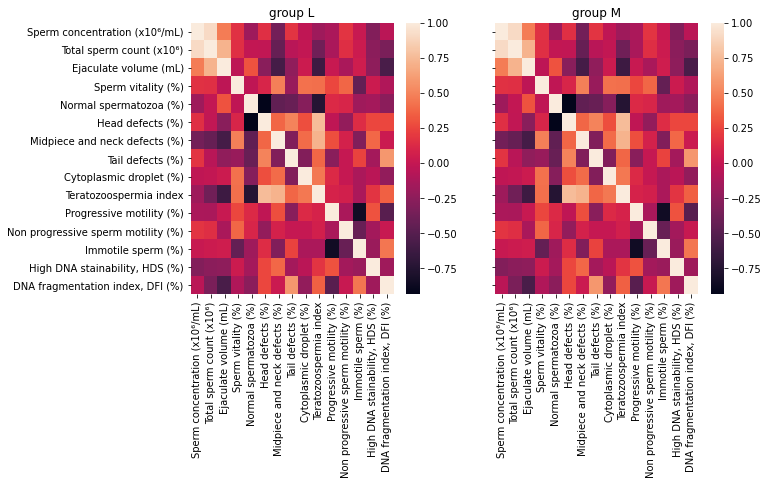

In [187]:
fig, axes = plt.subplots(1, 2, sharex = True, sharey= True, figsize=(10,5))
sn.heatmap(semen.loc[semen['group']==0,semen.columns != 'group'].corr(), annot=False, ax = axes[0]) 
sn.heatmap(semen.loc[semen['group']==0,semen.columns != 'group'].corr(), annot=False, ax = axes[1]) 
axes[0].title.set_text('group L')
axes[1].title.set_text('group M')
axes[0].yaxis.label.set_size(200)
axes[0].xaxis.label.set_size(200)
plt.savefig('semen.pdf')
plt.show()